<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Многослойная-сеть-на-PyTorch" data-toc-modified-id="Многослойная-сеть-на-PyTorch-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><b>Многослойная сеть на PyTorch</b></a></span><ul class="toc-item"><li><span><a href="#Компоненты-нейросети" data-toc-modified-id="Компоненты-нейросети-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><b>Компоненты нейросети</b></a></span></li><li><span><a href="#Многослойная-нейронная-сеть" data-toc-modified-id="Многослойная-нейронная-сеть-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><b>Многослойная нейронная сеть</b></a></span><ul class="toc-item"><li><span><a href="#Forward-pass-в-MLP" data-toc-modified-id="Forward-pass-в-MLP-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Forward pass в MLP</a></span></li></ul></li><li><span><a href="#Многослойная-нейросеть-на-PyTorch" data-toc-modified-id="Многослойная-нейросеть-на-PyTorch-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><b>Многослойная нейросеть на PyTorch</b></a></span></li><li><span><a href="#Полезные-ссылки" data-toc-modified-id="Полезные-ссылки-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span><b>Полезные ссылки</b></a></span></li></ul></li></ul></div>

---

<h2 style="text-align: center;"><b>Многослойная сеть на PyTorch</b></h3>

---

В этом ноутбке мы научимся писать свои нейросети на фреймворке PyTorch, конкретно - рассмотрим, как написать многослойную полносвязную сеть (Fully-Connected, FC).

<h3 style="text-align: center;"><b>Компоненты нейросети</b></h3>

Здесь самое время напомнить о том, какие вещи играют принципиальную роль в построении любой ***нейронной сети*** (все их мы задаём *руками*, самостоятельно):  

- непосредственно, сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количество итераций обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

<h3 style="text-align: center;"><b>Многослойная нейронная сеть</b></h3>

Как можно понять из названия, многослойная нейросеть состоит из нескольких **слоёв**. Каждый слой состоит из **нейронов**. Ранее мы уже писали свой нейрон на NumPy, вот из таких нейронов и состоит ***MLP (Multi-Layer Perceptron)***. Ещё такую многослойную нейросеть, у которой каждый нейрон на предыдущем уровне соединён с нейроном на следующем уровне, называют ***Fully-Connected-сетью*** (или ***Dense-сетью***).  

Расмотрим их устройство более подробно:

* Вот так выглядит двухслойная нейросеть (первый слой - input layer - не считается, потому что это, по сути, не слой):

<img src="http://cs231n.github.io/assets/nn1/neural_net.jpeg" width=300, height=200>

* Так выглядит трёхслойная нейросеть:

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" width=400, height=300>

.. и так далее для большего случая слоёв.

**Обратите внимание:** связи есть у нейронов со слоя $L_{i-1}$  и нейронов $L_{i}$, но между нейронами в одном слое связей **нет**.

**Входной слой** -- это данные (матрица $(n, m)$).

Слои, которые не являются входными или выходными, называются **скрытыми слоями (hidden layers)**.

При решении ***задачи регрессии*** на **выходном слое** обычно один нейрон, который возвращает предсказанные числа (для каждого объекта по числу).  

В случае ***задачи классификации*** на **выходном слое** обычно один нейрон, если задача бинарной классификации, и $K$ нейронов, если задача $K$-класовой классификации.

#### Forward pass в MLP

Каждый слой многослойной нейросети - это матрица весов, столбцы которой -- это нейроны (один столбец - один нейрон). То есть один столбец -- это веса одного нейрона.

Допустим, мы решаем задачу $K$-классовой классификации (на последнем слое $K$ нейронов). Рассмотрим, как в таком случае выглядит `forward_pass` нейросети:

* Вход: $$X =
\left(
\begin{matrix} 
x_{11} & ... & x_{1M} \\
... & \ddots  & ...\\
x_{N1} & ... & x_{NM} 
\end{matrix}
\right)
$$

-- матрица $(N, M)$

* Структура сети - много слоёв, в слоях много нейронов. Первый слой (после входного) выглядит так:

$$ W^1 =
\left(
\begin{matrix} 
w_{11} & ... & w_{1L_1} \\
... & \ddots  & ...\\
w_{M1} & ... & w_{ML_1} 
\end{matrix}
\right)
$$

-- матрица $(M, L_1)$

То есть это в точности $L_1$ нейронов, каждый имеет свои собственные веса, их $M$ штук.

Мы помним, что нейрон - это линейное преобразование и потом нелинейная функция активации от этого преобразования. Однако в многослойных нейростеях часто отделяют `Linear` часть и `Activation`, то есть слоем считаем набор весов нейронов, а следующий слой всегда функция активации (у всех нейронов из слоя она одна и та же, обычно фреймворки не позволяют задавать конкретному нейрону в слое отличную от других нейронов в этом слое функцию активации, однако это легко сделать, объявив слой из одного нейрона).

* Другие слои выглядит точно так же, как первый слой. Например, второй слой будет такой:

$$ W^2 =
\left(
\begin{matrix} 
w_{11} & ... & w_{1L_2} \\
... & \ddots  & ...\\
w_{L_11} & ... & w_{L_1L_2} 
\end{matrix}
\right)
$$

-- матрица $(L_1, L_2)$

То есть это в точности $L_2$ нейронов, каждый имеет свои собственные веса, их $L_1$ штук.

* Выходной слой:  

Пусть в нейросети до выходного слоя идут $t$ слоёв. Тогда выходной слой имеет форму:

$$ W^{out} =
\left(
\begin{matrix} 
w_{11} & ... & w_{1K} \\
... & \ddots  & ...\\
w_{L_t1} & ... & w_{L_tK} 
\end{matrix}
\right)
$$

-- матрица $(L_t, K)$, где $L_t$ - количество нейронов в $t$-ом слое, а $K$ -- количество классов.

В итоге *для `forward_pass` нам нужно просто последовтельно перемножить матрицы друг за другом, применяя после каждого умножения соответсвующую функцию активации*.

*Примечание*: можно думать об умножении на очередную матрицу весов как на переход в **новое признаковое пространство**. Действительно, когда подаём матрицу $X$ и умножаем на матрицу первого слоя, мы получаем матрицу размера $(N, L_1)$, то есть как будто $L_1$ "новых" признаков (построенных как линейная комбинация старых до применения функции активации, и уже как нелинейная комбинация после активации). Здесь уместно вспомнить, что Deep Learning является пообластью Representation Learning, то есть позволяет выучивает новые представляения данных.

**Backward pass в MLP**

Обучается с помощью метода "Error Backpropagation" - ["Обратное распространение ошибки"](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BE%D1%88%D0%B8%D0%B1%D0%BA%D0%B8), принцип распространения очень похож на то, как мы обучали один нейрон - это градиентный спуск, но по "всей нейросети" сразу.  

Backpropagation работает корректно благодаря ***chain rule*** (=правилу взятия производной сложной функции):  

Если $f(x) = f(g(x))$, то:  

$$\frac{\partial{f}}{\partial{x}} = \frac{\partial{f}}{\partial{g}} \frac{\partial{g}}{\partial{x}}$$

Более подробно про backpropagation можно прочитать здесь (на английском):  https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

<h3 style="text-align: center;"><b>Многослойная нейросеть на PyTorch</b></h3>

Ешё раз напомним про основные компоненты нейросети:

- непосредственно, сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количетсво **эпох** обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

Cоздадим двухслойную нейросеть из 100 нейронов:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch

Генерация и отрисовка датасета:

In [2]:
N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

Не забываем оборачивать данные (без этого градиенты не посчитать):

In [3]:
X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.LongTensor(y.astype(np.int64)))

In [4]:
print(X.data.shape, y.data.shape)

torch.Size([300, 2]) torch.Size([300])


Сама ячейка с нейросетью и обучением:

In [5]:
# N - размер батча (batch_size, нужно для метода оптимизации); 
# D_in - размерность входа (количество признаков у объекта);
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
N, D_in, H, D_out = 64, 2, 100, 3

# Use the nn package to define our model and loss function.
two_layer_net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(two_layer_net.parameters(), lr=learning_rate)
for t in range(500):
    # forward
    y_pred = two_layer_net(X)

    # loss
    loss = loss_fn(y_pred, y)
    print('{} {}'.format(t, loss.data))

    # зануляем градиенты (чтобы не было остатка с редыдущего шага)
    optimizer.zero_grad()

    # backward
    loss.backward()

    # обновляем
    optimizer.step()

C:\Users\maks\anaconda3\Lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 339.2721252441406
1 336.70196533203125
2 334.2757568359375
3 331.9738464355469
4 329.7799377441406
5 327.6803283691406
6 325.663818359375
7 323.7208251953125
8 321.8436584472656
9 320.026123046875
10 318.2626647949219
11 316.5489501953125
12 314.881103515625
13 313.2560729980469
14 311.671142578125
15 310.1240539550781
16 308.6129455566406
17 307.1360168457031
18 305.6917419433594
19 304.279052734375
20 302.8966979980469
21 301.5435485839844
22 300.2185363769531
23 298.9208068847656
24 297.6496276855469
25 296.4042053222656
26 295.18377685546875
27 293.98779296875
28 292.8154602050781
29 291.6661376953125
30 290.53924560546875
31 289.4342346191406
32 288.3505859375
33 287.2877502441406
34 286.2451477050781
35 285.2223815917969
36 284.218994140625
37 283.2345886230469
38 282.2684631347656
39 281.3204040527344
40 280.38995361328125
41 279.4766845703125
42 278.58026123046875
43 277.70037841796875
44 276.8366394042969
45 275.9885559082031
46 275.15576171875
47 274.3379821777344
48 273.53

494 209.1953582763672
495 209.1596221923828
496 209.1239013671875
497 209.08824157714844
498 209.0525360107422
499 209.0168914794922


**Обратите внимание:** несмотря на то, что это задача 3-х классовой классификации и столбец $y$ нужно по-хорошему кодировать OneHotEncoding'ом, мы подали просто столбец из 0, 1 и 2 и всё отработало. Дело в том, что PyTorch сам делает OneHot в таком случае.

Проверим, насколько хороша наша сеть из 100 нейронов:

In [6]:
# Обратно в Numpy для отрисовки
X = X.data.numpy()
y = y.data.numpy()

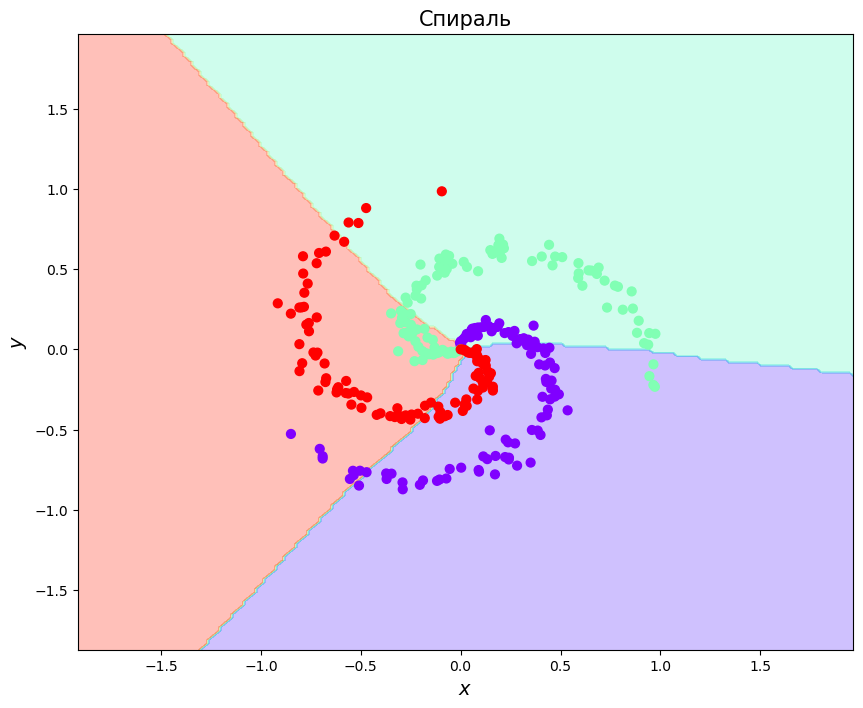

In [7]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

Z = two_layer_net(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Спираль', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

Подберём гиперпараметры получше:

Не забываем оборачивать данные (без этого градиенты не посчитать):

In [8]:
N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

In [9]:
# оборачиваем данные
X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.LongTensor(y.astype(np.int64)))

In [10]:
N, D_in, H, D_out = 64, 2, 100, 3

In [19]:
#создаем сеть better_net с 4-мя слоями
better_net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

In [20]:
# функция потерь как и раньше Кроссэнтропия
loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

In [21]:
# learning rate задаём 1e-3
learning_rate = 1e-3

In [22]:
#оптимизатор не меняем
optimizer = torch.optim.SGD(better_net.parameters(), lr=learning_rate)

In [23]:
# обучаем на 1000 эпохах
for t in range(1000):
    # forward
    y_pred = better_net(X)

    # loss
    loss = loss_fn(y_pred, y)
    print('{} {}'.format(t, loss.data))

    # зануляем градиенты (чтобы не было остатка с редыдущего шага)
    optimizer.zero_grad()

    # backward
    loss.backward()

    # обновляем
    optimizer.step()

0 330.26239013671875
1 328.289306640625
2 326.4604797363281
3 324.7044677734375
4 322.8827819824219
5 321.0408935546875
6 319.1070861816406
7 317.1076965332031
8 314.9536437988281
9 312.5712890625
10 309.9967041015625
11 307.23687744140625
12 304.2618408203125
13 301.0523376464844
14 297.61962890625
15 293.9233093261719
16 289.9613037109375
17 285.7509460449219
18 281.33917236328125
19 276.7790832519531
20 272.06201171875
21 267.2099914550781
22 262.2855529785156
23 257.3336181640625
24 252.41712951660156
25 247.64329528808594
26 243.0608673095703
27 238.73587036132812
28 234.6990966796875
29 230.97000122070312
30 227.55697631835938
31 224.46084594726562
32 221.66770935058594
33 219.1611328125
34 216.91444396972656
35 214.9364471435547
36 213.2968292236328
37 212.3348846435547
38 213.27743530273438
39 219.8036346435547
40 242.87322998046875
41 276.8041687011719
42 302.65118408203125
43 224.38037109375
44 215.16717529296875
45 210.5403289794922
46 207.6245574951172
47 206.228271484375
4

462 12.498140335083008
463 12.653945922851562
464 12.452672958374023
465 12.6134033203125
466 12.372140884399414
467 12.518362045288086
468 12.326676368713379
469 12.5026216506958
470 12.272653579711914
471 12.454187393188477
472 12.243448257446289
473 12.445596694946289
474 12.217981338500977
475 12.420255661010742
476 12.15225601196289
477 12.365249633789062
478 12.124286651611328
479 12.328920364379883
480 12.063118934631348
481 12.27994441986084
482 12.036264419555664
483 12.232237815856934
484 12.005410194396973
485 12.20789909362793
486 11.949220657348633
487 12.112883567810059
488 11.919361114501953
489 12.059816360473633
490 11.8679838180542
491 11.976842880249023
492 11.86741828918457
493 11.92164421081543
494 11.838309288024902
495 11.825824737548828
496 11.87018871307373
497 11.78909969329834
498 11.896418571472168
499 11.723875999450684
500 11.981804847717285
501 11.690276145935059
502 12.07247257232666
503 11.643166542053223
504 12.22548770904541
505 11.702101707458496
506

875 10.657602310180664
876 9.630681991577148
877 10.386788368225098
878 9.451985359191895
879 10.15380573272705
880 9.2838134765625
881 9.966357231140137
882 9.144917488098145
883 9.820304870605469
884 9.015424728393555
885 9.68475341796875
886 8.90799331665039
887 9.503573417663574
888 8.754598617553711
889 9.329124450683594
890 8.639765739440918
891 9.204873085021973
892 8.550954818725586
893 9.127887725830078
894 8.48870849609375
895 9.065471649169922
896 8.456010818481445
897 9.040781021118164
898 8.421560287475586
899 9.013435363769531
900 8.385892868041992
901 8.987265586853027
902 8.351823806762695
903 8.959321975708008
904 8.31705093383789
905 8.930956840515137
906 8.285002708435059
907 8.903614044189453
908 8.236186981201172
909 8.851066589355469
910 8.215462684631348
911 8.83869457244873
912 8.200907707214355
913 8.817782402038574
914 8.189657211303711
915 8.791285514831543
916 8.182945251464844
917 8.761634826660156
918 8.181625366210938
919 8.725791931152344
920 8.186548233

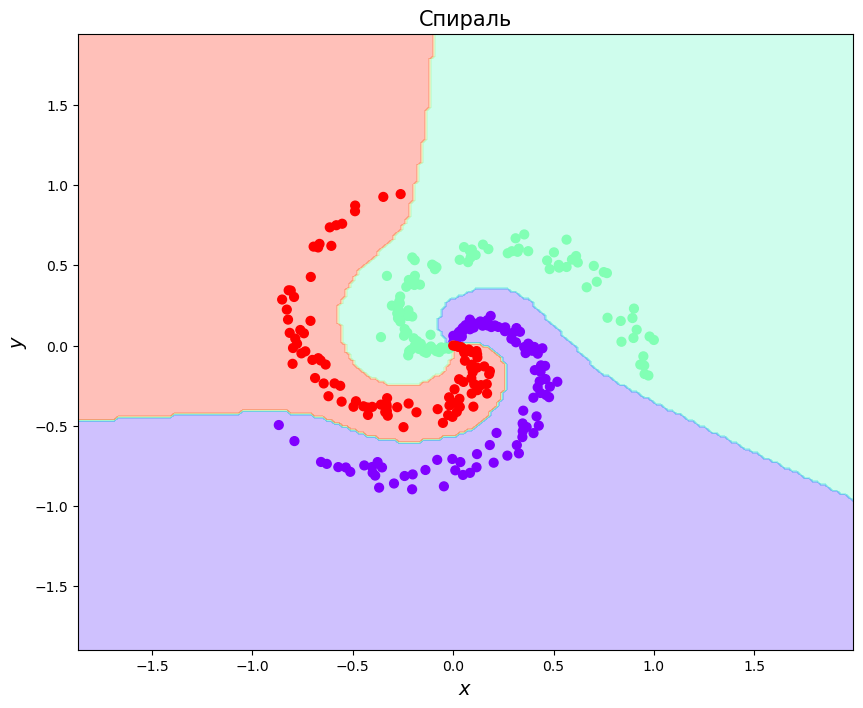

In [24]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

Z = better_net(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Спираль', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

Предлагается самостоятельно проанализировать то, что было изменено, чтобы улучшить качество модели (и *обратить на это внимание*).

---

<h3 style="text-align: center;"><b>Полезные ссылки</b></h3>

1). *Примеры написания нейросетей на PyTorch (офийиальные туториалы) (на английском): https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#examples  
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html*

2). Курс Стэнфордского Университета:  http://cs231n.github.io/

3). Практически исчерпывающая информация по основам нейросетей (из cs231n) (на английском):  

http://cs231n.github.io/neural-networks-1/,  
http://cs231n.github.io/neural-networks-2/,  
http://cs231n.github.io/neural-networks-3/,  
http://cs231n.github.io/neural-networks-case-study/#linear

4). *Хорошие статьи по основам нейросетей (на английском):  http://neuralnetworksanddeeplearning.com/chap1.html*

5). *Наглядная демонстрация того, как обучаются нейросети:  https://cs.stanford.edu/people/karpathy/convnetjs/*

6). *Подробнее про backpropagation -- статья на Medium: https://medium.com/autonomous-agents/backpropagation-how-neural-networks-learn-complex-behaviors-9572ac161670*

7). *Статья из интернета по Backprop: http://page.mi.fu-berlin.de/rojas/neural/chapter/K7.pdf*